In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download solarmainframe/ids-intrusion-csv

 99% 1.59G/1.60G [00:07<00:00, 201MB/s]
100% 1.60G/1.60G [00:07<00:00, 217MB/s]


In [ ]:
! unzip ids-intrusion-csv.zip

Archive:  ids-intrusion-csv.zip
  inflating: 02-14-2018.csv          
  inflating: 02-15-2018.csv          
  inflating: 02-16-2018.csv          
  inflating: 02-20-2018.csv          
  inflating: 02-21-2018.csv          
  inflating: 02-22-2018.csv          
  inflating: 02-23-2018.csv          
  inflating: 02-28-2018.csv          
  inflating: 03-01-2018.csv          
  inflating: 03-02-2018.csv          


In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from google.colab import files

In [ ]:
day8 = pd.read_csv("/content/02-28-2018.csv")

day9 = pd.read_csv("/content/03-01-2018.csv")

day10 = pd.read_csv("/content/03-02-2018.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = pd.concat([day8,day9], ignore_index=True)
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,28/02/2018 08:22:16,102429,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,28/02/2018 08:22:16,167,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


Benign           782237
Infilteration    161934
Label                58
Name: Label, dtype: int64


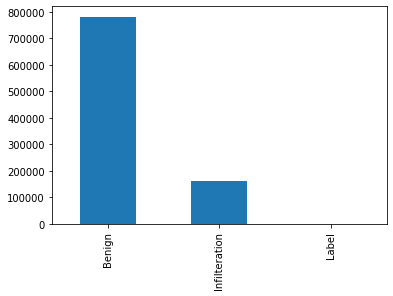

In [ ]:
df.shape
df['Label'].value_counts().plot.bar()
print(df['Label'].value_counts())

In [ ]:
index_val = df[df["Label"]=="Label"].index
df.drop(index_val, inplace=True)

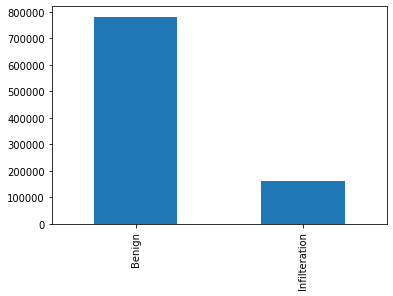

In [ ]:
df['Label'].value_counts().plot.bar()


In [ ]:
df1 = pd.concat([df,day10], ignore_index=True)
df1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,28/02/2018 08:22:16,102429,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,28/02/2018 08:22:16,167,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


Benign           1544621
Bot               286191
Infilteration     161934
Name: Label, dtype: int64


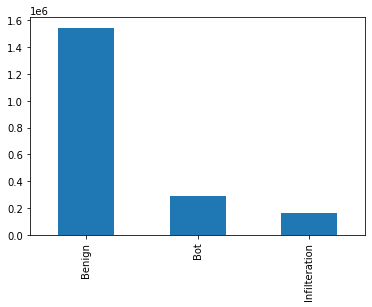

In [ ]:
df1['Label'].value_counts().plot.bar()
print(df1['Label'].value_counts())

In [ ]:
df1.reset_index(inplace = True, drop = True)

In [ ]:
X = df1.drop(['Label'], axis=1)
y = df1['Label']

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

Benign           161934
Bot              161934
Infilteration    161934
Name: Label, dtype: int64


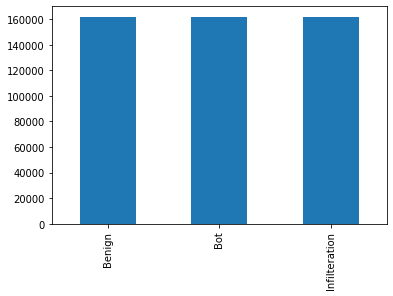

In [ ]:
y_resampled.value_counts().plot.bar()
print(y_resampled.value_counts())

In [ ]:
day123 = pd.read_csv('/content/drive/MyDrive/day123_preprocessed_dataset.csv')

In [ ]:
data = X_resampled
data['Label'] = y_resampled

In [ ]:
df2 = pd.concat([data,day123], ignore_index=True)

Benign                      172924
Bot                         161934
Infilteration               161934
DoS attacks-GoldenEye        10990
DoS attacks-Hulk             10990
DoS attacks-SlowHTTPTest     10990
DoS attacks-Slowloris        10990
FTP-BruteForce               10990
SSH-Bruteforce               10990
Name: Label, dtype: int64


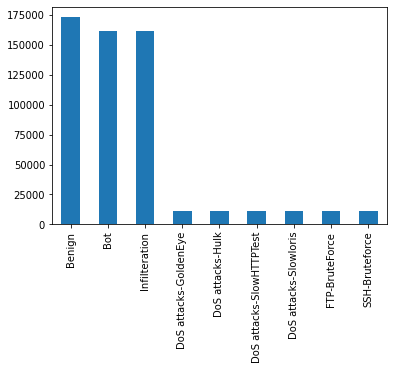

In [ ]:
df2['Label'].value_counts().plot.bar()
print(df2['Label'].value_counts())

In [ ]:
X1 = df2.drop(['Label'], axis=1)
y1= df2['Label']

In [ ]:
X_res, y_res = rus.fit_resample(X1, y1)

Benign                      10990
Bot                         10990
DoS attacks-GoldenEye       10990
DoS attacks-Hulk            10990
DoS attacks-SlowHTTPTest    10990
DoS attacks-Slowloris       10990
FTP-BruteForce              10990
Infilteration               10990
SSH-Bruteforce              10990
Name: Label, dtype: int64


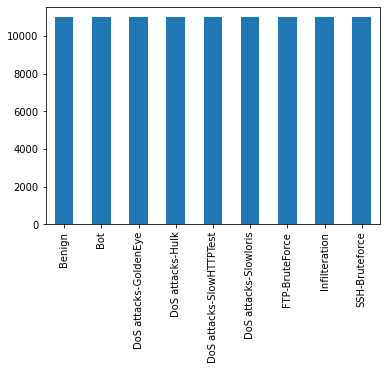

In [ ]:
y_res.value_counts().plot.bar()
print(y_res.value_counts())

In [ ]:
final_data = X_res
final_data['Label'] = y_res

In [ ]:
final_data.to_csv('undersampled_preprocessed_dataset.csv', encoding = 'utf-8-sig') 
files.download('undersampled_preprocessed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>